In [49]:
import numpy as np
import pandas as pd
    
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
data = pd.read_csv('Text_Clutering.csv', header = None)
data.shape

(120201, 1)

In [53]:
data.columns = [ 'Text']

In [54]:
data.columns


Index(['Text'], dtype='object')

In [55]:
data.head(10)

,Text
0,Description
1,"Reuters - Short-sellers, Wall Street's dwindli..."
2,Reuters - Private investment firm Carlyle Grou...
3,Reuters - Soaring crude prices plus worries\ab...
4,Reuters - Authorities have halted oil export\f...
5,"AFP - Tearaway world oil prices, toppling reco..."
6,Reuters - Stocks ended slightly higher on Frid...
7,AP - Assets of the nation's retail money marke...
8,USATODAY.com - Retail sales bounced back a bit...
9,Forbes.com - After earning a PH.D. in Sociolog...


In [56]:
data['Length'] = data['Text'].apply(len)


In [57]:
data.head(10)

,Text,Length
0,Description,11
1,"Reuters - Short-sellers, Wall Street's dwindli...",94
2,Reuters - Private investment firm Carlyle Grou...,214
3,Reuters - Soaring crude prices plus worries\ab...,184
4,Reuters - Authorities have halted oil export\f...,195
5,"AFP - Tearaway world oil prices, toppling reco...",160
6,Reuters - Stocks ended slightly higher on Frid...,195
7,AP - Assets of the nation's retail money marke...,178
8,USATODAY.com - Retail sales bounced back a bit...,197
9,Forbes.com - After earning a PH.D. in Sociolog...,390


In [58]:
len(data.Text[0])

11

In [59]:
data.groupby('Length').describe().tail(20)


Text                                                               
       count unique                                                top freq
Length                                                                     
3354       1      1  England duo hit centuries\n\nSecond Test, Durb...    1
3367       1      1  Connors' rallying cry for British tennis\n\n"D...    1
3429       1      1  Celts savour Grand Slam prospect\n\nThe Six Na...    1
3459       1      1  Campbell rescues Arsenal\n\nSol Campbell prove...    1
3563       1      1  Lee runs through Windies\n\nVB Series match 6,...    1
3634       1      1  Wales hails new superstar\n\nOne game into his...    1
3708       1      1  Ireland win eclipses refereeing 'errors'\n\nTh...    1
3848       1      1  Paris promise raises Welsh hopes\n\nHas there ...    1
3966       1      1  England 17-18 France\n\nEngland suffered an ei...    1
4007       1      1  Federer joins all-time greats\n\nThe last year...    1
4070       1      1  England victory tainted by history\n\nAs Engla...    1
4223       1      1  Italy 8-38 Wales\n\nWales secured their first ...    1
4255       1      1  2004: An Irish Athletics Year\n\n2004 won't be...    1
4257       1      1  Ireland 19-13 England\n\nIreland consigned Eng...    1
4281       1      1  Radcliffe tackles marathon tasks\n\nPaula Radc...    1
4681       1      1  Highbury will be our Cup final\n\nArsenal is a...    1
5104       1      1  Athens memories soar above lows\n\nWell, it's ...    1
5274       1      1  Henman to face Saulnier test\n\nBritish number...    1
7766       1      1  Nadal puts Spain 2-0 up\n\nResult: Nadal 6-7 (...    1
9646       1      1  England left in tatters in Durban\n\nTea, day ...    1

In [60]:
data.groupby('Length').describe().head(20)

Text                                                               
       count unique                                                top freq
Length                                                                     
6          9      1                                             #NAME?    9
11         1      1                                        Description    1
20         1      1                               The Associated Press    1
28         1      1                       Expect clarification soonest    1
30         1      1                     Sophisticated kit - at a price    1
32         1      1                   TechWeb - News - August 13, 2004    1
33         1      1                  May result in unexpected behavior    1
34         7      2                 The Associated Press By Ted Bridis    6
37         5      3              The Associated Press By Rachel Konrad    3
38         3      3             Suit professional fraudster, n/s, gsoh    1
39         1      1            The Associated Press By Michael Liedtke    1
40         4      4           Reuters - Sorry Florida. This is normal.    1
42         3      3         Reuters - Mobile phone giants Vodafone and    1
43         5      5        Reuters - Think of it as Wi-Fi on steroids.    1
44         4      4       'Freedom to destroy freedom and competition'    1
45         6      6      Early sighting of ID scheme budget-laundering    1
46         4      4     Redefining confronting your weaknesses head-on    1
47         4      4    First-come, first-served system 'not unethical'    1
48         5      5   Lawsuit doom over 228 'stolen' patents predicted    1
49        10     10  Or more properly, could have lost them their jobs    1

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

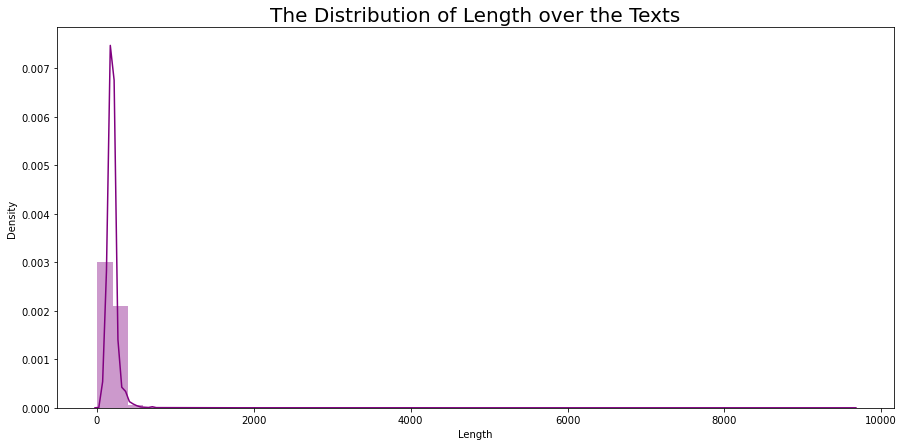

In [61]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

Text(0.5, 1.0, 'WordCloud ')

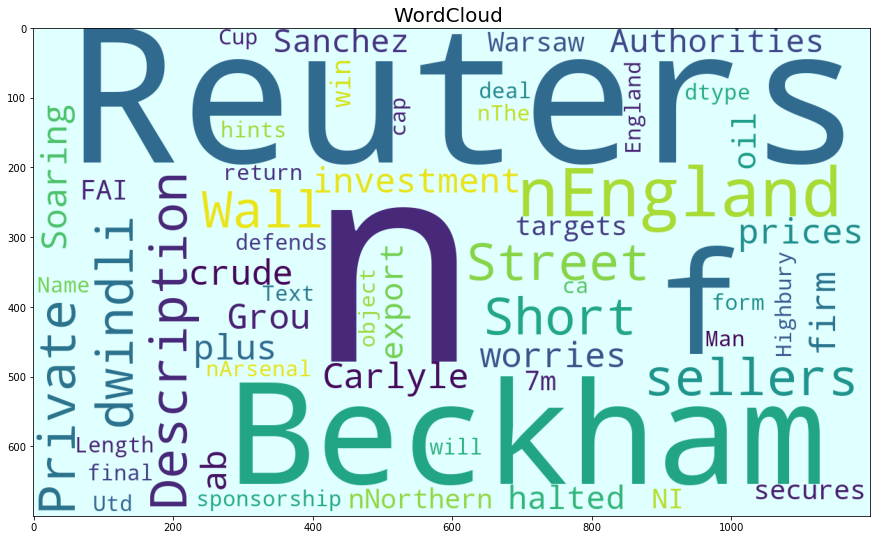

In [62]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(data['Text']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

In [64]:
import sys
print(sys.executable)

C:\Users\risha\anaconda3\python.exe


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

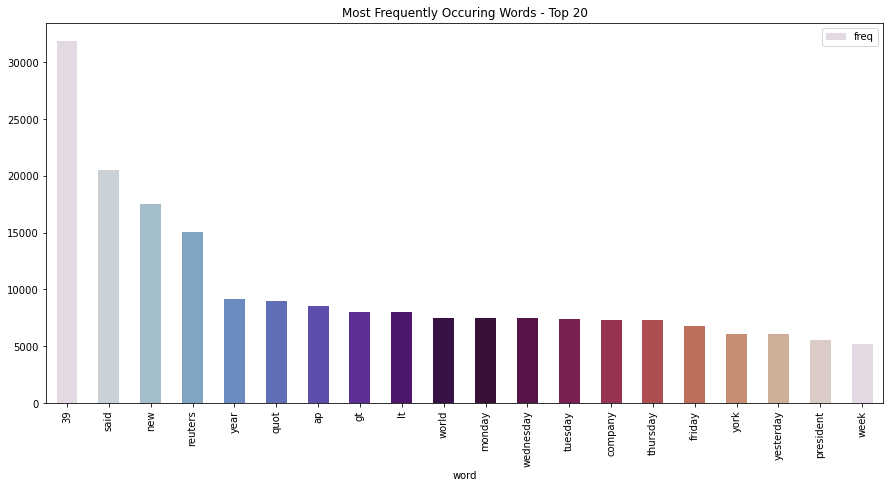

In [65]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Least Frequently Occuring Words - Top 20')

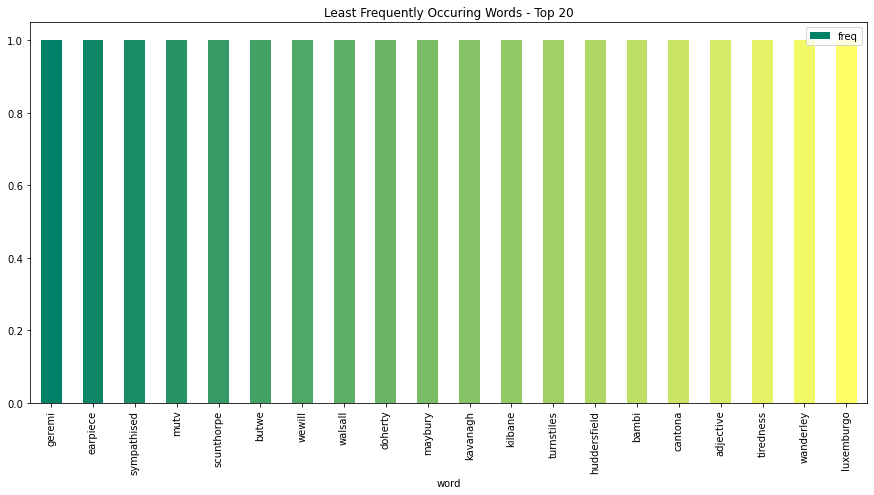

In [66]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Least Frequently Occuring Words - Top 20")

In [67]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [69]:
data.head(5)

,Text,Length
0,Description,11
1,"Reuters - Short-sellers, Wall Street's dwindli...",94
2,Reuters - Private investment firm Carlyle Grou...,214
3,Reuters - Soaring crude prices plus worries\ab...,184
4,Reuters - Authorities have halted oil export\f...,195


In [76]:
corpus = []

for i in range(0, 120201):
    review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [77]:
corpus

['descript',
 'reuter short seller wall street dwindl band ultra cynic see green',
 'reuter privat invest firm carlyl group reput make well time occasion controversi play defens industri quietli place bet anoth part market',
 'reuter soar crude price plu worri economi outlook earn expect hang stock market next week depth summer doldrum',
 'reuter author halt oil export flow main pipelin southern iraq intellig show rebel militia could strike infrastructur oil offici said saturday',
 'afp tearaway world oil price toppl record strain wallet present new econom menac bare three month us presidenti elect',
 'reuter stock end slightli higher friday stay near low year oil price surg past barrel offset posit outlook comput maker dell inc dell',
 'ap asset nation retail money market mutual fund fell billion latest week trillion invest compani institut said thursday',
 'usatoday com retail sale bounc back bit juli new claim jobless benefit fell last week govern said thursday indic economi improv 

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data['Text'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (120201, 2000)


# clustering

In [82]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(max_iter=100, n_clusters=10, n_init=1)

In [83]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

# prediction on the Text no. 1
Y = vectorizer.transform(["Claxton hunting first major medal British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. I am quite confident, said Claxton. But I take each race as it comes. As long as I keep up my training but not do too much I think there is a chance of a medal.Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous seasons, the 25-year-old also contested the long jump but since moving from Colchester to London she has re-focused her attentions. Claxton will see if her new training regime pays dividends at the European Indoors which take place on 5-6 March"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

# Prediction on the Text no.2
Y = vectorizer.transform(["O Sullivan could run in Worlds Sonia O'Sullivan has indicated that she would like to participate in next month's World Cross Country Championships in St Etienne.Athletics Ireland have hinted that the 35-year-old Cobh runner may be included in the official line-up for the event in France on 19-20 March. Provincial teams were selected after last Saturday's Nationals in Santry and will be officially announced this week. O'Sullivan is at present preparing for the London marathon on 17 April. The participation of O'Sullivan, currentily training at her base in Australia, would boost the Ireland team who won the bronze three years agio. The first three at Santry last Saturday, Jolene Byrne, Maria McCambridge and Fionnualla Britton, are automatic selections and will most likely form part of the long-course team. OSullivan will also take part in the Bupa Great Ireland Run on 9 April in Dublin."])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Top terms per cluster:
Cluster 0:
 friday
 said
 reuters
 ap
 39
 new
 year
 company
 united
 government
Cluster 1:
 said
 year
 company
 reuters
 million
 software
 ap
 thursday
 tuesday
 monday
Cluster 2:
 oil
 prices
 crude
 barrel
 reuters
 stocks
 record
 new
 york
 high
Cluster 3:
 new
 york
 reuters
 39
 said
 tuesday
 year
 company
 monday
 ap
Cluster 4:
 game
 season
 night
 ap
 team
 win
 victory
 league
 sunday
 saturday
Cluster 5:
 39
 world
 said
 company
 year
 largest
 yesterday
 week
 today
 biggest
Cluster 6:
 lt
 gt
 fullquote
 reuters
 http
 href
 www
 ticker
 quickinfo
 aspx
Cluster 7:
 president
 minister
 prime
 bush
 john
 said
 kerry
 election
 ap
 39
Cluster 8:
 killed
 iraq
 people
 baghdad
 said
 iraqi
 police
 palestinian
 killing
 al
Cluster 9:
 quot
 39
 said
 new
 yesterday
 president
 says
 year
 game
 called


Prediction
Cluster number : [4]
Cluster number : [4]
